In [34]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [36]:
#load dataframe and setup
df = pd.read_csv("winequality-red.csv", delimiter = ";", header = 0)
df['quality'] = (df['quality'] > 5).astype(int)
df_features = df.drop(['quality'],axis=1)
X = df_features.to_numpy()
y = df['quality'].to_numpy()

In [37]:
 #test partition with given rules
 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.40, random_state = 42)

**Question 1**

In [38]:
#train DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 12, random_state = 0)
dtc = dtc.fit(X_train,y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

#train accuracy
accuracy_score(y_true=y_train, y_pred=y_pred_train)

0.9895724713242962

In [39]:
#test accuracy
accuracy_score(y_true=y_test, y_pred=y_pred_test)

0.728125

**Question 2**

In [40]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 0)
rfc = rfc.fit(X_train,y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

#train accuracy
accuracy_score(y_true=y_train, y_pred=y_pred_train)

0.9989572471324296

In [41]:
#test accuracy
accuracy_score(y_true=y_test, y_pred=y_pred_test)

0.8015625

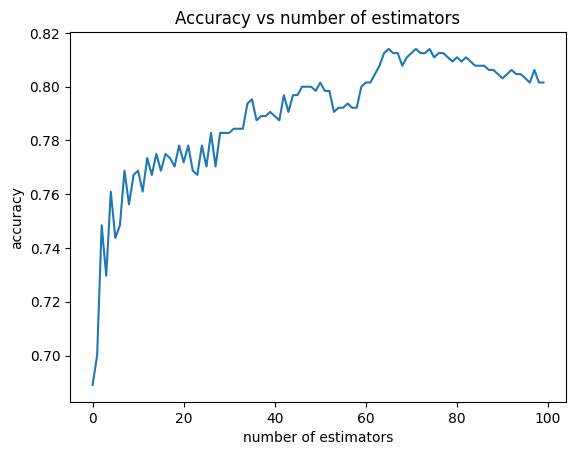

In [42]:
#train rfc with different number of estimators to plot a graph
accuracies = []
for i in range(1,101):
  rfc = RandomForestClassifier(n_estimators = i, max_depth = 12, random_state = 0)
  rfc = rfc.fit(X_train,y_train)
  y_pred_test = rfc.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred_test))


#plot accuracy vs estimators
plt.plot(accuracies)
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.title("Accuracy vs number of estimators")
plt.show()

**Question 3**

In [43]:
# train rfc without randomly picking features, set max_features to max features (= 11 )
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 0, max_features=11)
rfc = rfc.fit(X_train,y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

#train accuracy
accuracy_score(y_true=y_train, y_pred=y_pred_train)

0.9989572471324296

In [44]:
#test accuracy
accuracy_score(y_true=y_test, y_pred=y_pred_test)

0.7875

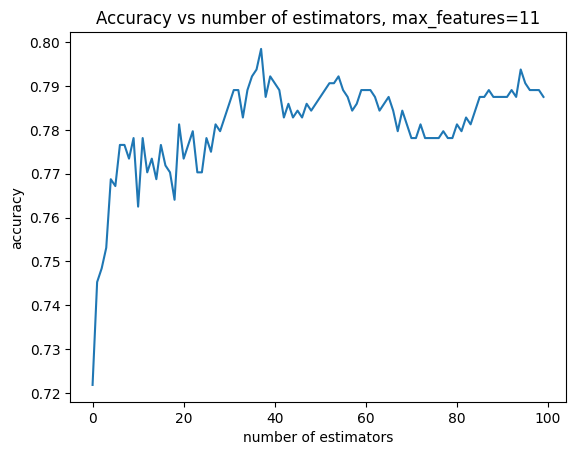

In [45]:
#train rfc with different number of estimators to plot a graph without random features
accuracies = []
for i in range(1,101):
  rfc = RandomForestClassifier(n_estimators = i, max_depth = 12, random_state = 0,max_features=11)
  rfc = rfc.fit(X_train,y_train)
  y_pred_test = rfc.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred_test))

#plot accuracy vs estimators
plt.plot(accuracies)
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.title("Accuracy vs number of estimators, max_features=11")
plt.show()